In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


## Define Paths

In [25]:
train_path = 'dataset/train'
test_path = 'dataset/test'


##  Load and Preprocess Images

In [26]:
# ImageDataGenerator for preprocessing the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the datasets
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for matching order
)

Found 1214 images belonging to 4 classes.
Found 337 images belonging to 4 classes.


## Build the CNN Model

In [27]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax') # output layer
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 57600)             0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 57600)             0         
                                                                 
 dense_5 (Dense)             (None, 128)              

## : Train the Model

In [29]:
# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
38/38 [==============================] - 18s 441ms/step - loss: 0.9430 - accuracy: 0.6713 - val_loss: 0.4425 - val_accuracy: 0.8042
Epoch 2/10
38/38 [==============================] - 16s 427ms/step - loss: 0.3926 - accuracy: 0.8460 - val_loss: 0.2772 - val_accuracy: 0.9050
Epoch 3/10
38/38 [==============================] - 16s 429ms/step - loss: 0.3244 - accuracy: 0.8814 - val_loss: 0.1911 - val_accuracy: 0.9288
Epoch 4/10
38/38 [==============================] - 16s 427ms/step - loss: 0.2278 - accuracy: 0.9275 - val_loss: 0.1476 - val_accuracy: 0.9466
Epoch 5/10
38/38 [==============================] - 16s 426ms/step - loss: 0.1328 - accuracy: 0.9522 - val_loss: 0.0767 - val_accuracy: 0.9733
Epoch 6/10
38/38 [==============================] - 16s 413ms/step - loss: 0.0976 - accuracy: 0.9712 - val_loss: 0.0526 - val_accuracy: 0.9822
Epoch 7/10
38/38 [==============================] - 15s 405ms/step - loss: 0.0998 - accuracy: 0.9671 - val_loss: 0.0629 - val_accuracy: 0.9852

## save the model

In [30]:
model.save('image_model.h5')

In [31]:
# Get predictions
predictions = model.predict(test_generator)
y_pred = predictions.argmax(axis=1)

# Get true labels
y_true = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())


11/11 [==============================] - 2s 151ms/step


## Evaluate Model

In [32]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

11/11 [==============================] - 2s 152ms/step - loss: 0.0187 - accuracy: 0.9941
Test Accuracy: 99.41%


In [33]:
model.save('image_model.h5')


## Plot Training Results

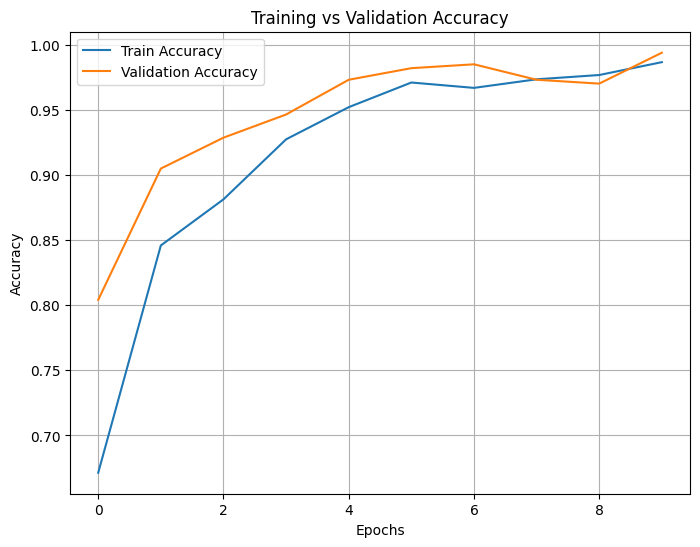

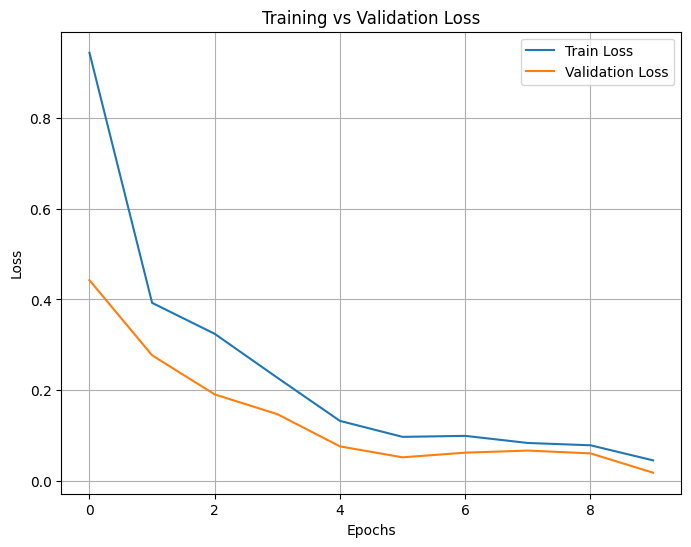

In [34]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


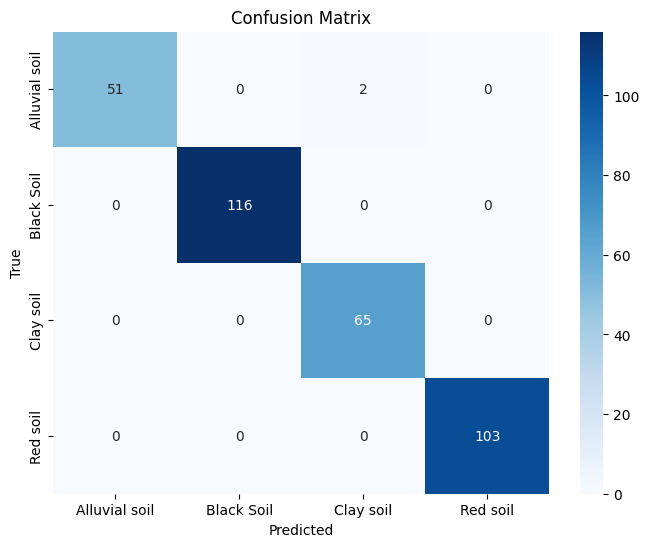

Classification Report:

               precision    recall  f1-score   support

Alluvial soil       1.00      0.96      0.98        53
   Black Soil       1.00      1.00      1.00       116
    Clay soil       0.97      1.00      0.98        65
     Red soil       1.00      1.00      1.00       103

     accuracy                           0.99       337
    macro avg       0.99      0.99      0.99       337
 weighted avg       0.99      0.99      0.99       337



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))
